In [1]:
import auto_ts as AT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


Imported Auto_Timeseries version: 0.0.14. Call by using:
        auto_ts.Auto_Timeseries(trainfile, ts_column,
                            sep=',', target=None, score_type='rmse', forecast_period=2,
                            timeinterval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None,
                            verbose=0)
    To get detailed charts of actuals and forecasts, set verbose = 1


In [2]:
import pandas as pd
import numpy as np

In [3]:
datapath = 'example_datasets/'
filename1 = 'Google_Stock_Price_Train.csv'
filename2 = 'energy_dataset.csv'

In [4]:
train = pd.read_csv(datapath+filename1,index_col=None)
print(train.shape)
train.head(1)

(1258, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"


In [5]:
preds = [x for x in list(train) if x not in ['Date']]
len(preds)

5

In [6]:
train['Close'] = train['Close'].str.replace(',', '').astype(np.float32)
train['Volume'] = train['Volume'].str.replace(',', '').astype(np.float32)

In [7]:
#dft = dft.iloc[::48,]
dft = train[:1000]
print(dft.shape)
dft.head()

(1000, 6)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.590027,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.450012,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.210022,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.239990,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.760010,11688800.0


In [8]:
ts_column = 'Date'
sep = ','
target = 'Close'
dft[[ts_column,target]].isnull().sum()

Date     0
Close    0
dtype: int64

In [9]:
score_type = 'rmse'
forecast_period = 5
timeinterval = 'Daily'
non_seasonal_pdq = (3, 1, 3)
seasonality = True
seasonal_periods = 24

Input is data frame. Performing Time Series Analysis
    Target variable = Close
Time Interval is given as Daily

Running Machine Learning Models...
    Shifting 4 predictors by lag=4 to align prior predictor with current target...
Running multiple models...
    Instance Based = 1.2464 
    Boosting = 1.2531
    Linear Model = 2.7204 
    Bagging = 1.4883
Best Model = SVR with 1.25 Normalized RMSE score

Model Results:
    RMSE = 114.01
    Std Deviation of Originals = 183.81
    Normalized RMSE = 62%


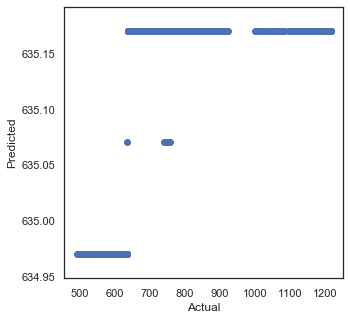

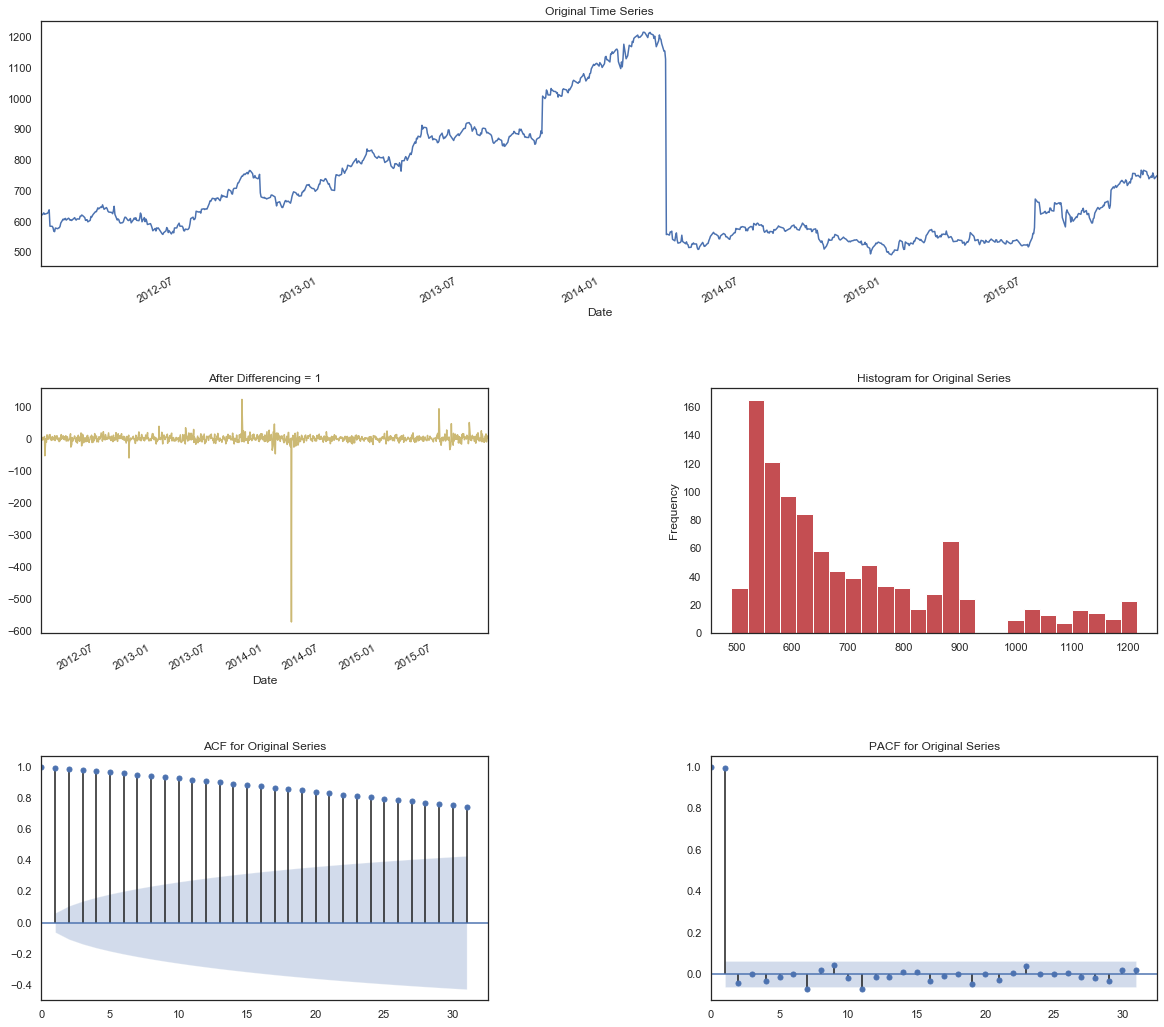


Best Model is:
    ML
    Best Model Score: 114.01


In [10]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="ml", verbose=1)